<h1>Monthly Foreclosures Prediction <br>
Using Linear Regression</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

<h2> Read data set, assign features and split into X and y </h2>

In [2]:
df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

In [3]:
def isJan(date):
    if date[5:7] == '01':
        return 1
    else:
        return 0
    
#df['isJan'] = df['DATE'].apply(lambda x: isJan(x))

df
df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels = (df.columns)
feature_labels = feature_labels.drop(['FORECLOSURE'])
#feature_labels =['DATE_DELTA','mnth_cos', 'mnth_sin', 'CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index', 'CPI STICKY','MORT30US']
X = df[feature_labels]
y = df[['FORECLOSURE']]

print(X.shape)
print(y.shape)
print(feature_labels)
print(len(feature_labels))

df

(105, 13)
(105, 1)
Index(['DATE', 'CAUR', 'Average DGS', 'DFF', 'NASDAQCOM', 'ZHVI', 'MORT30US',
       'BofA_Yield_Index_PCH', 'CA_Consumer_Price_Index', 'CPI STICKY',
       'mnth_sin', 'mnth_cos', 'DATE_DELTA'],
      dtype='object')
13


,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY,mnth_sin,mnth_cos,DATE_DELTA
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814,0.000000e+00,1.000000e+00,0.0
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186,5.000000e-01,8.660254e-01,31.0
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857,8.660254e-01,5.000000e-01,59.0
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161,1.000000e+00,6.123234e-17,90.0
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235,8.660254e-01,-5.000000e-01,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575,8.660254e-01,-5.000000e-01,3042.0
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963,5.000000e-01,-8.660254e-01,3073.0
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465,1.224647e-16,-1.000000e+00,3103.0
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544,-5.000000e-01,-8.660254e-01,3134.0


In [4]:
date_delta = X['DATE_DELTA']
feature_labels_less_Date = feature_labels.drop(['DATE','DATE_DELTA'])
names = {}
for i in range(0,len(feature_labels_less_Date)):
    names[i] = feature_labels_less_Date[i]

X = pd.DataFrame(preprocessing.scale(X[feature_labels_less_Date])).rename(columns = names)
X = X.join(date_delta)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=2)
print(X_test.shape)
print(y_test.shape)
print(feature_labels_less_Date)

(25, 12)
(25, 1)
Index(['CAUR', 'Average DGS', 'DFF', 'NASDAQCOM', 'ZHVI', 'MORT30US',
       'BofA_Yield_Index_PCH', 'CA_Consumer_Price_Index', 'CPI STICKY',
       'mnth_sin', 'mnth_cos'],
      dtype='object')


<h2>Plot results</h2>

R_2: 0.15202812502578444, RMSE 573.4653633486771 i 0
0.15202812502578444
R_2: -1.006284840269588, RMSE 346.5154219286501 i 1
1.006284840269588
R_2: 0.25840749863934664, RMSE 547.8732898228701 i 2
0.25840749863934664
R_2: -2.80363330652181, RMSE 291.0165635689867 i 3
2.80363330652181
R_2: 0.24574447764716012, RMSE 525.1074372213953 i 4
0.24574447764716012
R_2: -0.2961928218595331, RMSE 369.9258074017754 i 5
0.2961928218595331
R_2: 0.1248244589073848, RMSE 275.9287976251298 i 6
0.1248244589073848


<Figure size 640x480 with 0 Axes>

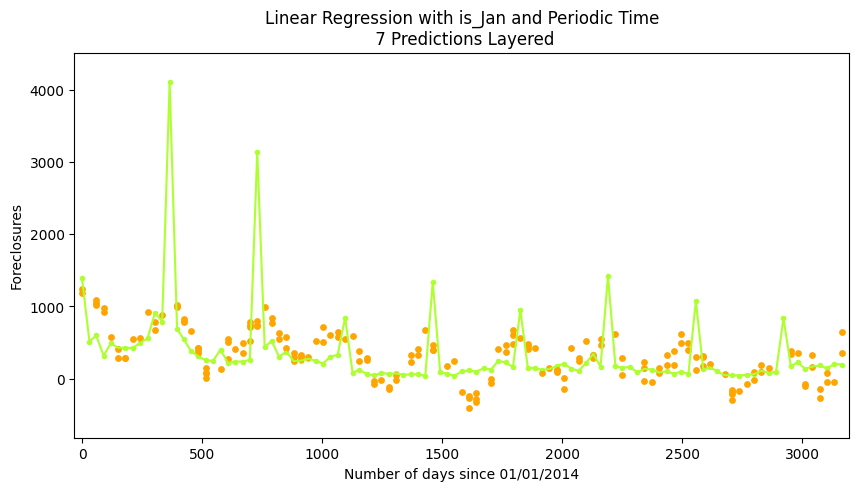

R_2 avg: 0.8145192548117679, RMSE 418.5475258453549 i 6


In [6]:
# Plot the results
avg_rmse = 0
avg_r2 = 0
plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
for i in range(0,7):
    X_train, X_test_3, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=i)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred_3 = regressor.predict(X_test_3)
    mse = metrics.mean_squared_error(y_test, y_pred_3)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred_3)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred_3))
    print(abs(r2_score(y_test,y_pred_3)))
    plt.scatter(X_test_3['DATE_DELTA'], y_pred_3,s=15, c="orange")
plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Linear Regression with is_Jan and Periodic Time\n 7 Predictions Layered")
plt.savefig('../plots/LinearRegression_Multiple_runs_with_periodic.png')
plt.show()
print(f"R_2 avg: {avg_r2 / i}, RMSE {avg_rmse / (i+1)} i {i}")

R^2 score: -4.793727973792016 RMSE:  782.0938567146593
Y intercept: [1377.7772273]
Coefficients: [[ 3.26448673e+01 -2.02823197e+02  9.79431111e+01 -6.24506185e+01
   7.71834681e+00  2.84896843e+01  5.76482315e+00  3.88254450e+02
   4.04939820e-01  4.07083756e+02  2.90366206e-01  4.86474491e+01
  -6.52290619e-01]]
32.64*X_0 + -202.82*X_1 + 97.94*X_2 + -62.45*X_3 + 7.72*X_4 + 28.49*X_5 + 5.76*X_6 + 388.25*X_7 + 0.40*X_8 + 407.08*X_9 + 0.29*X_10 + 48.65*X_11 + -0.65*X_12 


<Figure size 640x480 with 0 Axes>

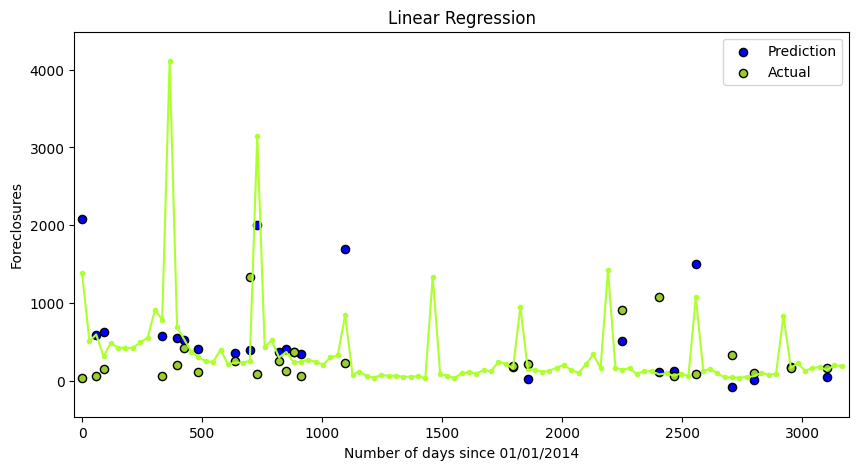

In [6]:
linregression = LinearRegression()
linregression.fit(X_train,y_train)
y_pred = linregression.predict(X_test)
y_pred
r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
y_intercept = linregression.intercept_
lin_coef = linregression.coef_
print(f"R^2 score: {r2_score(y_test,y_pred)} RMSE:  {rmse}")
print(f"Y intercept: {y_intercept}")
print(f"Coefficients: {lin_coef}")

# Plot the results
plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=35, edgecolor="black", c="blue", label="Prediction")
plt.scatter(X_test['DATE_DELTA'], y_test, s=35, edgecolor="black", c="yellowgreen", label="Actual")

message = ""
lin_coef = lin_coef.flatten()
#print(lin_coef)
for i in range(0, len(X.columns)):
    #message += str(f"{lin_coef[i]:.2f}*{X.columns[i]} + ")
    message += str(f"{lin_coef[i]:.2f}*X_{i} + ")
print(message[:-2])

plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Linear Regression")
plt.legend()
plt.savefig('../plots/LinearRegression.png')
plt.show()

In [7]:
message = ""
lin_coef = lin_coef.flatten()
print(lin_coef)
for i in range(0, len(X.columns)):
    #message += str(f"{lin_coef[i]:.2f}*{X.columns[i]} + ")
    message += str(f"{lin_coef[i]:.2f}*X_{i} + ")
print(message[:-2])


[ 3.26448673e+01 -2.02823197e+02  9.79431111e+01 -6.24506185e+01
  7.71834681e+00  2.84896843e+01  5.76482315e+00  3.88254450e+02
  4.04939820e-01  4.07083756e+02  2.90366206e-01  4.86474491e+01
 -6.52290619e-01]
32.64*X_0 + -202.82*X_1 + 97.94*X_2 + -62.45*X_3 + 7.72*X_4 + 28.49*X_5 + 5.76*X_6 + 388.25*X_7 + 0.40*X_8 + 407.08*X_9 + 0.29*X_10 + 48.65*X_11 + -0.65*X_12 


R_2: 0.7224460679459419, RMSE 328.0878595816757 i 0
0.7224460679459419


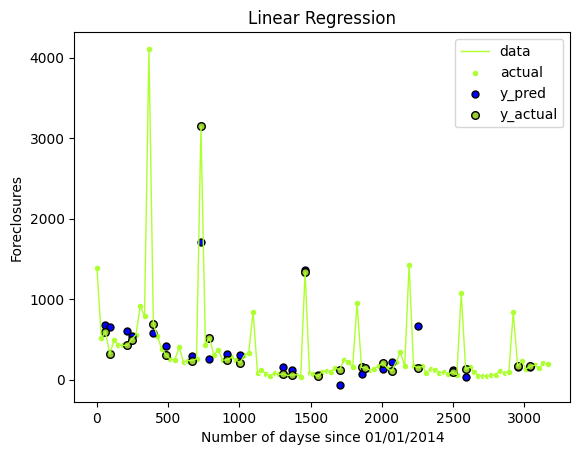

R_2: 0.5956101685089902, RMSE 155.5701912032204 i 1
0.5956101685089902


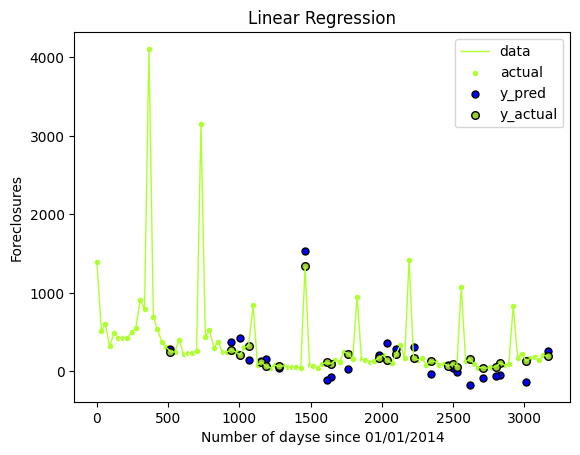

R_2: 0.6391859136225531, RMSE 382.1547000668724 i 2
0.6391859136225531


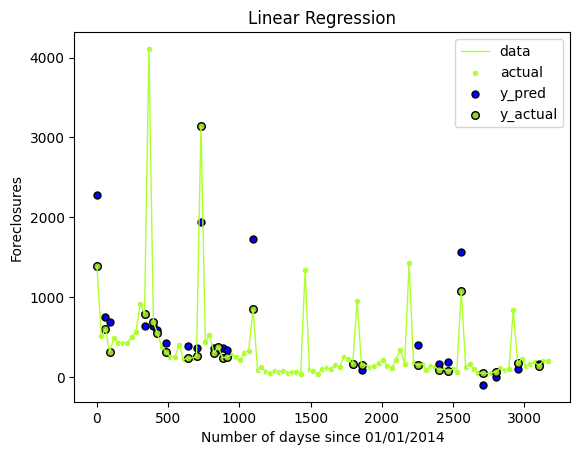

R_2: 0.041664467789972126, RMSE 146.07543311445738 i 3
0.041664467789972126


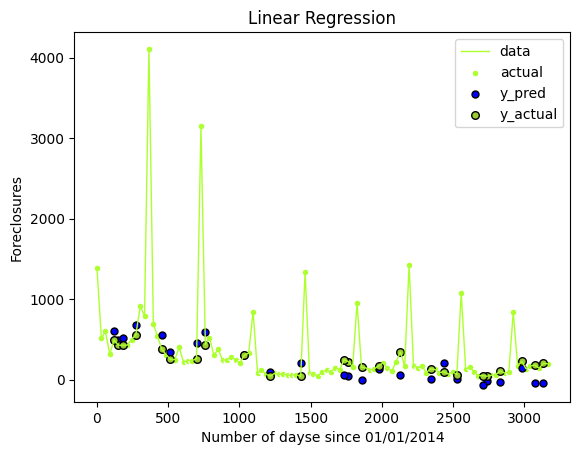

R_2: 0.7119537882363356, RMSE 324.50396229764607 i 4
0.7119537882363356


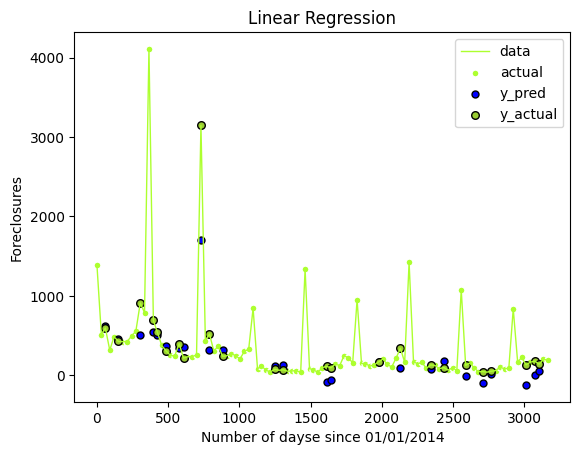

R_2: 0.7632198335622766, RMSE 158.10750489427224 i 5
0.7632198335622766


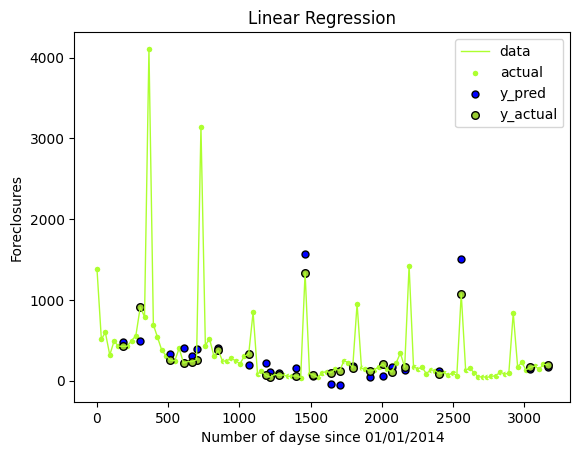

R_2: -0.007804491050564577, RMSE 296.0994408624839 i 6
0.007804491050564577


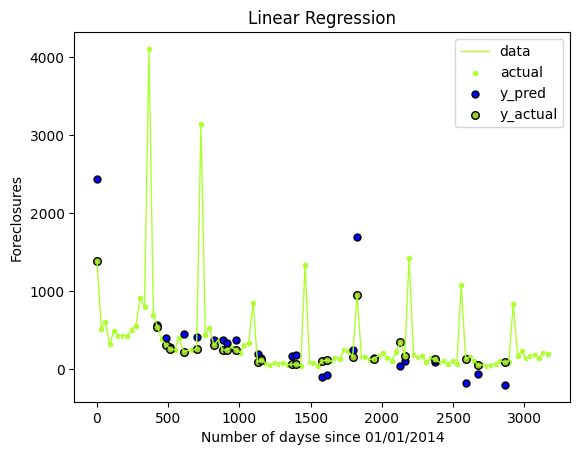

R_2: 0.513881977498517, RMSE 549.3673108609368 i 7
0.513881977498517


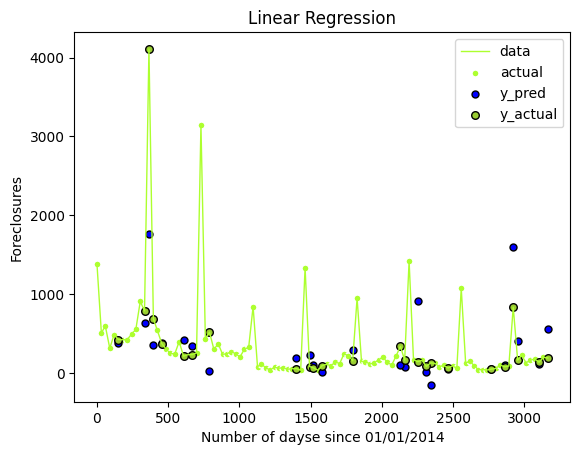

R_2: 0.4733110987637241, RMSE 702.5367287823161 i 8
0.4733110987637241


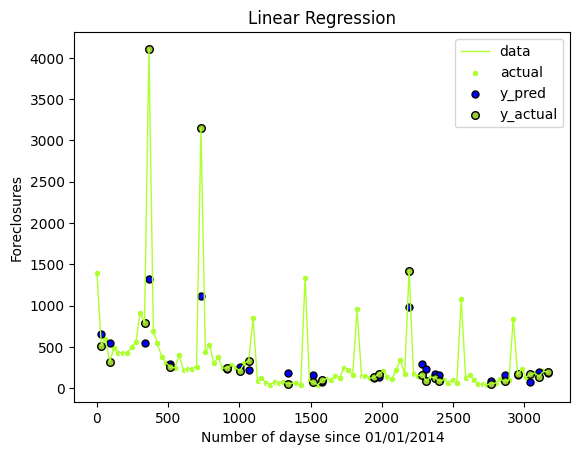

R_2: 0.7005571876525012, RMSE 169.39617832492587 i 9
0.7005571876525012


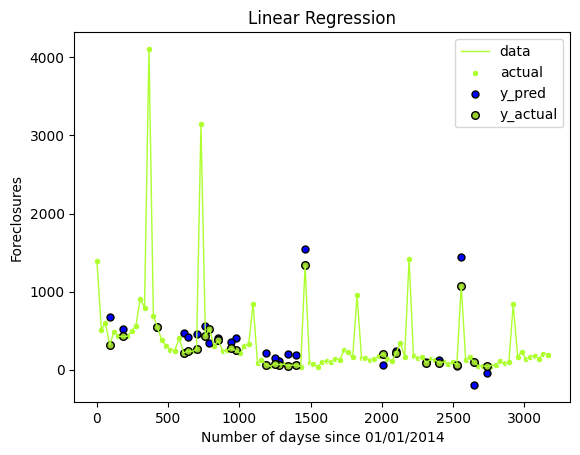

R_2 avg: 0.5744038882923752, RMSE 321.1899309988807 i 9


In [8]:
import matplotlib.pyplot as plt
avg_rmse = 0
avg_r2 = 0
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=i)
    linregression = LinearRegression()
    linregression.fit(X_train,y_train)
    y_pred = linregression.predict(X_test)
    
    #regressor = DecisionTreeRegressor(max_depth=13, random_state=10)
    #regressor = DecisionTreeRegressor(max_depth=12, random_state=1, min_weight_fraction_leaf=0.01)#, criterion=i)
    #regressor.fit(X_train,y_train)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred))
    print(abs(r2_score(y_test,y_pred)))
        # Plot the results
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=25, edgecolor="black", c="blue", label="y_pred")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=30, edgecolor="black", c="yellowgreen", label="y_actual")

    plt.xlabel("Number of dayse since 01/01/2014")
    plt.ylabel("Foreclosures")
    plt.title("Linear Regression")
    plt.legend()
    plt.show()
    
print(f"R_2 avg: {avg_r2 / i}, RMSE {avg_rmse / (i+1)} i {i}")
